<a href="https://colab.research.google.com/github/shobhit-saini/Neural_Network/blob/master/Cat_Vs_Non_Cat/3_Layer_Neural_Network/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

y = 0, it's a 'non-cat' picture.
y = 1, it's a 'cat' picture.


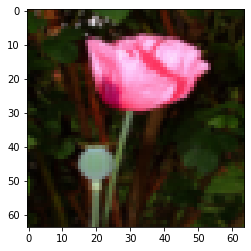

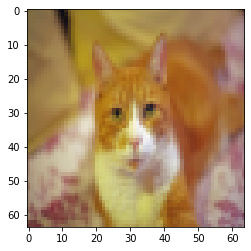

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import random

'''
Dimension:
train_set_x_orig:209,64,64
train_set_y_orig:1,209
test_set_x_orig:50,64,64
test_set_y_orig:1,50
flattend_train_x:12288, 209
flattend_test_x:12288, 50
'''
#Loding the data from h5 format file
def load_data():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_data()

#Analyze the data

plt.imshow(train_set_x_orig[30])
print ("y = " + str(train_set_y[0][30]) + ", it's a '" + classes[train_set_y[0][30]].decode("utf-8") +  "' picture.")
plt.figure()
plt.imshow(train_set_x_orig[24])
print ("y = " + str(train_set_y[0][24]) + ", it's a '" + classes[train_set_y[0][24]].decode("utf-8") +  "' picture.")

#Reshape the training and test data sets images of size (x,y,3) are flattend into single vector
'''flattend_train_set_x = []
for i in range(train_set_x_orig[0]):
  flattend_train_set_x.append( np.reshape(i, (1, train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*3)))
flattend_train_set_x = np.array(flattend_train_set_x)'''
flattend_train_set_x = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T 
flattend_test_set_x = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# Normalize the dataset
flattend_train_set_x = (flattend_train_set_x)/255
flattend_test_set_x = flattend_test_set_x/255

In [0]:
def relu(x):
  return np.maximum(0,x)
def relu_prime(x):
    return np.where(x > 0, 1.0, 0.0)

def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigma_prime(x):
  return sigmoid(x)*(1-sigmoid(x))

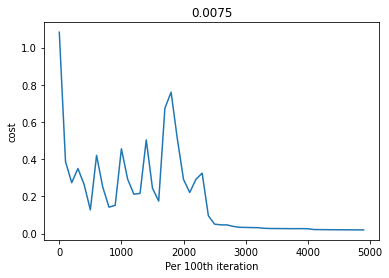

In [48]:
Input_Features = flattend_train_set_x.shape[0]
First_Hidden_Layer_Features = 100
Second_Hidden_Layer_Features = 40
Output_Features = 1
m = flattend_train_set_x.shape[1]

#Weight initialization
weight1 = np.random.randn(First_Hidden_Layer_Features, Input_Features)*np.sqrt(2/Input_Features) #(8,12288)
weight2 = np.random.randn(Second_Hidden_Layer_Features, First_Hidden_Layer_Features)*np.sqrt(2/First_Hidden_Layer_Features) #(4,8)
weight3 = np.random.randn(Output_Features, Second_Hidden_Layer_Features)*np.sqrt(1/Second_Hidden_Layer_Features) #(1,4)

#Bias initialization
bias1 = np.random.randn(First_Hidden_Layer_Features, 1)*np.sqrt(2/First_Hidden_Layer_Features) #(8,1)
bias2 = np.random.randn(Second_Hidden_Layer_Features, 1)*np.sqrt(2/Second_Hidden_Layer_Features)#(4,1)
bias3 = np.random.randn(Output_Features, 1)*np.sqrt(2/Output_Features)#(1,1)

#Initializing Hyperparameter
Learning_Rate = 0.0075

costlist = []
iteration = []
for i in range(5000):
  #Forward_Propagation
  A1 = flattend_train_set_x #(12288,209)
  Z2 = np.dot(weight1, A1) + bias1 #(8,12288)*(12288,209) = (8,209) + (8,1)-->broadcasting is done here = (8,209)
  #assert(Z2.shape == (8, 209))
  A2 = relu(Z2)
  #assert(A2.shape == (8,209))
  Z3 = np.dot(weight2, A2) + bias2 #(4,8)*(8,209) = (4,209) + (4,1) = (4,209)
  #assert(Z3.shape == (4,209))
  A3 = relu(Z3)
  #assert(A3.shape == (4,209))
  Z4 = np.dot(weight3, A3) + bias3 #(1,4)*(4,209) = (1,209) + (1,1) = (1,209)
  #assert(Z4.shape == (1,209))
  A4 = sigmoid(Z4)
  #assert(A4.shape == (1,209))

  #Backward_Propagation
  dZ4 = A4 - train_set_y #(1,209)
  assert(dZ4.shape == Z4.shape)
  dW3 = np.dot(dZ4, A3.T)/m #(1,209)*(209,4) = (1,4)
  assert(dW3.shape == weight3.shape)
  db3 = np.sum(dZ4, axis = 1, keepdims = True)/m
  assert(db3.shape == bias3.shape)
  dA3 = np.dot(weight3.T,dZ4) #(4,1)*(1,209) = (4,209)
  assert(dA3.shape == A3.shape)
  dZ3 = np.multiply(dA3,relu_prime(Z3)) #(4,209)**(4,209) = (4,209)
  assert(dZ3.shape == Z3.shape)
  dW2 = np.dot(dZ3, A2.T) #(4,209)*(209,8) = (4,8)
  assert(dW2.shape == weight2.shape)
  db2 = np.sum(dZ3, axis = 1, keepdims = True)/m #(4,1)
  assert(db2.shape == bias2.shape)
  dA2 = np.dot(weight2.T, dZ3) #(8,4)*(4,209) = (8,209)
  assert(dA2.shape == A2.shape)
  dZ2 = np.multiply(dA2, relu_prime(Z2)) #(8,209)**(8,209) = (8,209)
  assert(dZ2.shape == Z2.shape)
  dW1 = np.dot(dZ2,A1.T)/m #(8,209)*(209,12288) = (8,12288)
  assert(dW1.shape == weight1.shape)
  db1 = np.sum(dZ2, axis = 1, keepdims = True)/m #(8,1)
  assert(db1.shape == bias1.shape)
  '''________________________Update Parameters__________________________________'''
  weight1 -= Learning_Rate*dW1
  bias1 -= Learning_Rate*db1
  weight2 -= Learning_Rate*dW2
  bias2 -= Learning_Rate*db2
  weight3 -= Learning_Rate*dW3
  bias3 -= Learning_Rate*db3

  '''_______________________Cost_Calculation____________________________________'''
  l = np.multiply(train_set_y, np.log(A4)) + np.multiply( (1-train_set_y), np.log(1-A4) )
  cost = -np.sum(l)/m
  if i % 100 == 0:
    costlist.append(cost)
    iteration.append(i)

plt.plot(iteration, costlist)
plt.xlabel("Per 100th iteration")
plt.ylabel("cost")
plt.title(Learning_Rate)
plt.show()

In [49]:
def training_set_accuracy():
  #Forward_Propagation
  A1 = flattend_train_set_x #(12288, 50)
  Z2 = np.dot(weight1, A1) + bias1 
  A2 = relu(Z2)
  Z3 = np.dot(weight2, A2) + bias2 
  A3 = relu(Z3)
  Z4 = np.dot(weight3, A3) + bias3 
  A4 = sigmoid(Z4)

  predict_out = np.zeros((1,209))
  for i in range(flattend_train_set_x.shape[1]):
    if A4[0][i] <= 0.5:
      predict_out[0][i] = 0
    else:
      predict_out[0][i] = 1

  accuracy = 100 - (np.mean(abs(train_set_y - predict_out))*100)
  print( "Accuracy:", accuracy )
def test():
  #Forward_Propagation
  A1 = flattend_test_set_x #(12288, 50)
  Z2 = np.dot(weight1, A1) + bias1 
  A2 = relu(Z2)
  Z3 = np.dot(weight2, A2) + bias2 
  A3 = relu(Z3)
  Z4 = np.dot(weight3, A3) + bias3 
  A4 = sigmoid(Z4)

  predict_out = np.zeros((1,50))
  for i in range(flattend_test_set_x.shape[1]):
    if A4[0][i] <= 0.5:
      predict_out[0][i] = 0
    else:
      predict_out[0][i] = 1

  accuracy = 100 - (np.mean(abs(test_set_y - predict_out))*100)
  print( "Accuracy:", accuracy )
test()
training_set_accuracy()

Accuracy: 80.0
Accuracy: 99.52153110047847
